# Capital Bikeshare Project:

Use this notebook to determine:
1. Most frequent start and stop location
2. Group by member type
3. Create heat map for stop locations?
4. Determine route using Google Maps API

In [148]:
#Import dependencies
import path
import glob
import pandas as pd
import gmaps
import gmaps.datasets
from geopy.distance import geodesic
import math


from config import gkey
gmaps.configure(api_key=gkey)

In [13]:
#Loop thru all CSV files, and add to DataFrame
list_ = []

path = '../capitalbikeshare/CSV Files'
allFiles = glob.glob(path + "/*.csv")

for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)

frame = pd.concat(list_, axis = 0, ignore_index = True)

frame.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,679,2018-05-01 00:00:00,2018-05-01 00:11:19,31302,Wisconsin Ave & Newark St NW,31307,3000 Connecticut Ave NW / National Zoo,W22771,Member
1,578,2018-05-01 00:00:20,2018-05-01 00:09:59,31232,7th & F St NW / National Portrait Gallery,31609,Maine Ave & 7th St SW,W21320,Casual
2,580,2018-05-01 00:00:28,2018-05-01 00:10:09,31232,7th & F St NW / National Portrait Gallery,31609,Maine Ave & 7th St SW,W20863,Casual
3,606,2018-05-01 00:01:22,2018-05-01 00:11:29,31104,Adams Mill & Columbia Rd NW,31509,New Jersey Ave & R St NW,W00822,Member
4,582,2018-05-01 00:04:52,2018-05-01 00:14:34,31129,15th St & Pennsylvania Ave NW/Pershing Park,31118,3rd & Elm St NW,W21846,Member


In [138]:
#frame_groups = frame['End station'].value_counts()

frame_groups_size = frame.groupby(['Start station', 'End station',"Member type"]).size()


In [88]:
#frame_groups_size = frame.groupby(['Start station', 'End station']).size()
frame_groups_size = pd.DataFrame(frame_groups_size)
frame_groups_size = frame_groups_size.reset_index()
frame_groups_size = frame_groups_size.rename(columns={0:"Frequency"})
frame_groups_size

,Start station,End station,Member type,Frequency
0,10th & E St NW,10th & E St NW,Casual,426
1,10th & E St NW,10th & E St NW,Member,140
2,10th & E St NW,10th & Florida Ave NW,Casual,12
3,10th & E St NW,10th & Florida Ave NW,Member,6
4,10th & E St NW,10th & G St NW,Casual,39
5,10th & E St NW,10th & G St NW,Member,127
6,10th & E St NW,10th & K St NW,Casual,42
7,10th & E St NW,10th & K St NW,Member,154
8,10th & E St NW,10th & Monroe St NE,Casual,1
9,10th & E St NW,10th & Monroe St NE,Member,6


In [66]:
csv_file = "Capital_Bike_Share_Locations.csv"
bikeshare_location = pd.read_csv(csv_file)

bikeshare_locations = bikeshare_location[["ADDRESS","LATITUDE","LONGITUDE"]].copy()
bikeshare_locations_start = bikeshare_locations.rename(columns={"ADDRESS": "Start station", 
                                                                "LATITUDE": "Start Lat","LONGITUDE": "Start Long"})
bikeshare_locations_end = bikeshare_locations.rename(columns={"ADDRESS": "End station", 
                                                                "LATITUDE": "End Lat","LONGITUDE": "End Long"})




bikeshare_locations_end.head()

routes = pd.merge(frame_groups_size, bikeshare_locations_start, on=["Start station"])
routes = pd.merge(routes, bikeshare_locations_end, on=["End station"])

In [67]:
routes["Distance"] = 0.0
routes = routes.sort_values(["Frequency"], ascending=False).reset_index()

#routes = routes.columns = ["Start station", "Start Lat", "Start Long", "End station", "End Lat", "End Long", "0"]
routes.head(10)

,index,Start station,End station,Member type,Frequency,Start Lat,Start Long,End Lat,End Long,Distance
0,0,Smithsonian-National Mall / Jefferson Dr & 12t...,Smithsonian-National Mall / Jefferson Dr & 12t...,Casual,5506,38.888767,-77.028580,38.888767,-77.028580,0.0
1,1765,Jefferson Dr & 14th St SW,Jefferson Dr & 14th St SW,Casual,4796,38.888553,-77.032429,38.888553,-77.032429,0.0
2,2359,4th St & Madison Dr NW,4th St & Madison Dr NW,Casual,3955,38.890493,-77.017253,38.890493,-77.017253,0.0
3,3404,Lincoln Memorial,Jefferson Memorial,Casual,3871,38.888251,-77.049426,38.879819,-77.037413,0.0
4,44302,Columbus Circle / Union Station,6th & H St NE,Member,3776,38.896960,-77.004930,38.899972,-76.998347,0.0
5,81816,Columbus Circle / Union Station,8th & F St NE,Member,3411,38.896960,-77.004930,38.897274,-76.994749,0.0
6,559,Jefferson Dr & 14th St SW,Lincoln Memorial,Casual,3359,38.888553,-77.032429,38.888251,-77.049426,0.0
7,563,Lincoln Memorial,Lincoln Memorial,Casual,3282,38.888251,-77.049426,38.888251,-77.049426,0.0
8,6953,6th & H St NE,Columbus Circle / Union Station,Member,3228,38.899972,-76.998347,38.896960,-77.004930,0.0
9,6955,8th & F St NE,Columbus Circle / Union Station,Member,3145,38.897274,-76.994749,38.896960,-77.004930,0.0


In [69]:
routes_ten = routes.head(500)
routes_ten

,index,Start station,End station,Member type,Frequency,Start Lat,Start Long,End Lat,End Long,Distance
0,0,Smithsonian-National Mall / Jefferson Dr & 12t...,Smithsonian-National Mall / Jefferson Dr & 12t...,Casual,5506,38.888767,-77.028580,38.888767,-77.028580,0.0
1,1765,Jefferson Dr & 14th St SW,Jefferson Dr & 14th St SW,Casual,4796,38.888553,-77.032429,38.888553,-77.032429,0.0
2,2359,4th St & Madison Dr NW,4th St & Madison Dr NW,Casual,3955,38.890493,-77.017253,38.890493,-77.017253,0.0
3,3404,Lincoln Memorial,Jefferson Memorial,Casual,3871,38.888251,-77.049426,38.879819,-77.037413,0.0
4,44302,Columbus Circle / Union Station,6th & H St NE,Member,3776,38.896960,-77.004930,38.899972,-76.998347,0.0
5,81816,Columbus Circle / Union Station,8th & F St NE,Member,3411,38.896960,-77.004930,38.897274,-76.994749,0.0
6,559,Jefferson Dr & 14th St SW,Lincoln Memorial,Casual,3359,38.888553,-77.032429,38.888251,-77.049426,0.0
7,563,Lincoln Memorial,Lincoln Memorial,Casual,3282,38.888251,-77.049426,38.888251,-77.049426,0.0
8,6953,6th & H St NE,Columbus Circle / Union Station,Member,3228,38.899972,-76.998347,38.896960,-77.004930,0.0
9,6955,8th & F St NE,Columbus Circle / Union Station,Member,3145,38.897274,-76.994749,38.896960,-77.004930,0.0


In [131]:
marker_layer_start = gmaps.symbol_layer(routes_ten[['Start Lat', 'Start Long']].head(50), fill_color='green', stroke_color='green', scale=4)
marker_layer_end = gmaps.symbol_layer(routes_ten[['End Lat', 'End Long']].head(50), fill_color='red', stroke_color='red', scale=3)

fig = gmaps.figure()
fig.add_layer(marker_layer_start)
fig.add_layer(marker_layer_end)

fig

Figure(layout=FigureLayout(height='420px'))

In [141]:
starts_df = frame.groupby(['Start station']).size()
starts_df = pd.DataFrame(starts_df).reset_index()
starts_df = starts_df.rename(columns={"Start station": "Station", 0: "Frequency"})

ends_df = frame.groupby(['End station']).size()
ends_df = pd.DataFrame(ends_df).reset_index()
ends_df = ends_df.rename(columns={"End station": "Station", 0: "Frequency"})


most_popular = pd.merge(starts_df, ends_df, on="Station")
most_popular["Total"] = most_popular["Frequency_x"] + most_popular["Frequency_y"]
most_popular = most_popular.rename(columns={"Frequency_x":"Start count", "Frequency_y":"End count"})

bikeshare_locations_pop = bikeshare_locations.rename(columns={"ADDRESS": "Station", 
                                                                "LATITUDE": "Lat","LONGITUDE": "Long"})
most_popular = pd.merge(most_popular, bikeshare_locations_pop, on=["Station"])
most_popular = most_popular.sort_values(["Total"], ascending=False).reset_index()

most_popular.head()

,index,Station,Start count,End count,Total,Lat,Long
0,219,Columbus Circle / Union Station,63493,68100,131593,38.896960,-77.004930
1,332,Lincoln Memorial,53869,54397,108266,38.888251,-77.049426
2,302,Jefferson Dr & 14th St SW,43993,45473,89466,38.888553,-77.032429
3,144,4th St & Madison Dr NW,41888,42119,84007,38.890493,-77.017253
4,298,Henry Bacon Dr & Lincoln Memorial Circle NW,41020,41565,82585,38.890544,-77.049379


In [147]:
marker_layer = gmaps.heatmap_layer(most_popular[['Lat', 'Long']].head(50), weights=most_popular['Total'].head(50), max_intensity=10000, point_radius=6.0)

fig = gmaps.figure()
fig.add_layer(marker_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [162]:
radius = 6371 # km

for row in routes_ten.iterrows():
    dlat = math.radians(routes_ten["End Lat"]-routes_ten["End Lat"])
    dlon = math.radians(routes_ten["Start Long"]-routes_ten["End Long"])
    print(f"{dlat}, {dlong}")

TypeError: cannot convert the series to <class 'float'>

In [150]:
a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
d = radius * c

routes["Distance"] = d
routes.head()

TypeError: cannot convert the series to <class 'float'>

In [53]:
#Group by month and hour
m = frame.set_index(pd.DatetimeIndex(frame['Start date']))

m['Hour'] = m.index.hour
m['Month'] = m.index.month

#Group by member type
casual_hour = m.loc[m['Member type'] == 'Casual', :].groupby('Hour')['Bike number'].count()
casual_month = m.loc[m['Member type'] == 'Casual', :].groupby('Month')['Bike number'].count()

member_hour = m.loc[m['Member type'] == 'Member', :].groupby('Hour')['Bike number'].count()
member_month = m.loc[m['Member type'] == 'Member', :].groupby('Month')['Bike number'].count()

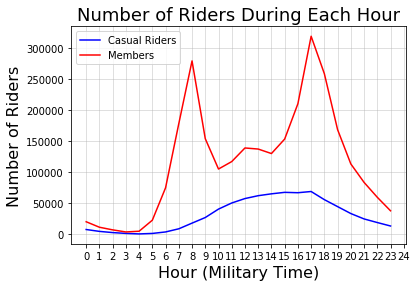

In [197]:
#Create plot for hour - Make sure to move dependencies to top, figure out how to shift hour?

import matplotlib.pyplot as plt
import numpy as np

x_axis = np.arange(0,24,1)

casual_hour_plt = plt.plot(x_axis, casual_hour, color = 'blue', label = 'Casual Riders')
member_hour_plt = plt.plot(x_axis, member_hour, color = 'red', label = 'Members')

plt.title('Number of Riders During Each Hour', fontsize = 18)
plt.xlabel('Hour (Military Time)', fontsize = 16)
plt.xticks(np.arange(0, 25, step = 1))
plt.ylabel('Number of Riders', fontsize = 16)
plt.grid(alpha = 0.5)
plt.legend(loc = 'best', prop={'size': 10})

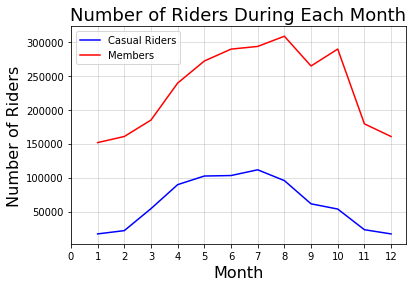

In [202]:
#Create plot for month

x_axis = np.arange(1,13,1)

casual_month_plt = plt.plot(x_axis, casual_month, color = 'blue', label = 'Casual Riders')
member_month_plt = plt.plot(x_axis, member_month, color = 'red', label = 'Members')

plt.title('Number of Riders During Each Month', fontsize = 18)
plt.xlabel('Month', fontsize = 16)
plt.xticks(np.arange(0, 13, step = 1))
plt.ylabel('Number of Riders', fontsize = 16)
plt.grid(alpha = 0.5)
plt.legend(loc = 'best', prop={'size': 10})